In [137]:
import os
import re
import random
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import FeatureHasher
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from scipy.spatial.distance import mahalanobis
from sklearn import cluster, datasets, mixture



In [138]:
to_modeling = pd.read_csv("to_modeling.csv")
to_modeling["default_ratio"] = list(map(lambda x,y:x/y,to_modeling.neg_diff,to_modeling.npayments))
to_modeling["earlypayer_ratio"] = list(map(lambda x,y:x/y,to_modeling.early_payment,to_modeling.npayments))
to_modeling.head()

name  old_cust  discont_cust  age  c_age  92101  92102  92103  \
0   Aaron Huston      True         False    0     38    0.0    0.0    0.0   
1    Abbey Kluth      True         False    0     46    0.0    0.0    0.0   
2    Abe Prophet      True         False    0     42    0.0    0.0    0.0   
3    Abel Emmett      True         False   45     45    0.0    0.0    0.0   
4  Abraham Maggi      True         False    0     41    0.0    0.0    0.0   

   92104  92105        ...         early_payment  late_payment  \
0    0.0    0.0        ...                    32             0   
1    0.0    0.0        ...                    12            20   
2    0.0    0.0        ...                    32             0   
3    0.0    0.0        ...                    32             0   
4    0.0    0.0        ...                    23             3   

   avg_pay_capacity  neg_diff  defaulter  paymentAmount  rentAmount  \
0         1720.0000         0      False        55040.0     55040.0   
1         1845.9688         0      False        59071.0     51808.0   
2         1107.2812         1       True        35433.0     36576.0   
3         1802.0000         0      False        57664.0     57664.0   
4         1306.8000         0      False        39204.0     38070.0   

   npayments  default_ratio  earlypayer_ratio  
0         32        0.00000          1.000000  
1         32        0.00000          0.375000  
2         32        0.03125          1.000000  
3         32        0.00000          1.000000  
4         26        0.00000          0.884615  

[5 rows x 96 columns]

In [131]:
to_modeling[(to_modeling["default_ratio"]==0.) & (to_modeling["earlypayer_ratio"]>0.925351)]

name  old_cust  discont_cust  age  c_age  92101  92102  \
0           Aaron Huston      True         False    0     38    0.0    0.0   
3            Abel Emmett      True         False   45     45    0.0    0.0   
7            Adan Havlik      True         False   22     22    0.0    0.0   
8     Adelia Terwilliger      True         False   67     67    0.0    0.0   
10            Adrian Moe      True         False   71     71    0.0    0.0   
13          Agnus Abadie      True         False   18     18    0.0    0.0   
16          Ahmad Eagles      True         False    0     39    0.0    0.0   
17           Ahmad Eakin      True         False    0     43    0.0    0.0   
18           Ahmed Lisby      True         False   60     60    0.0    0.0   
20         Aida Osterman      True         False   42     42    0.0    0.0   
22       Alaina Stutzman      True         False   31     31    0.0    0.0   
26         Alberta Paugh      True         False    0     41    0.0    0.0   
31        Alejandra Foti      True          True    0     41    0.0    0.0   
32         Alethia Klick      True          True   51     51    0.0    0.0   
34         Alfonso Boggs      True          True    0     42    0.0    0.0   
37         Alfred Virgen      True         False   32     32    0.0    0.0   
38           Alica Lomax      True         False   45     45    0.0    0.0   
40         Alice Wehling      True         False   46     46    0.0    0.0   
41            Alicia Wee     False         False    0     40    0.0    0.0   
45         Alleen Credle      True         False   46     46    0.0    0.0   
46           Alleen Litz     False         False   52     52    0.0    0.0   
48      Allyson Giberson      True         False    0     41    0.0    0.0   
50        Almeda Sanders      True         False    0     46    0.0    0.0   
54       Alva Guadarrama      True         False   29     29    0.0    0.0   
55        Alvera Goffney      True         False    0     45    0.0    0.0   
57       Alycia Kitchell      True         False    0     37    0.0    0.0   
58          Alyssa Mintz      True         False    0     45    0.0    0.0   
59      Amal Gillenwater      True         False   61     61    0.0    0.0   
60       Ambrose Puthoff      True         False   37     37    0.0    0.0   
61            Amee Eakin      True         False    0     56    0.0    0.0   
...                  ...       ...           ...  ...    ...    ...    ...   
1933      Waneta Zaremba      True         False   47     47    0.0    0.0   
1934        Wanetta Fyfe      True         False    0     45    0.0    0.0   
1935      Wanita Calzada      True         False    0     39    0.0    0.0   
1936           Ward Ealy      True         False   61     61    0.0    0.0   
1937      Warren Wengert      True         False   41     41    0.0    0.0   
1938    Waylon Schnitzer     False         False   59     59    0.0    0.0   
1940            Wei Losh      True         False   51     51    0.0    0.0   
1941        Weldon Perna      True         False    0     36    0.0    0.0   
1947      Wilford Mackin      True         False   54     54    0.0    0.0   
1950   Willene Cristobal      True         False   62     62    0.0    0.0   
1954       Willian Blust      True         False    0     39    0.0    0.0   
1956       Wilmer Carlin      True         False    0     41    0.0    0.0   
1957     Wilmer Standley     False         False    0     35    0.0    0.0   
1958      Wilson Ressler      True         False   49     49    0.0    0.0   
1960     Xavier Mennella      True         False    0     38    0.0    0.0   
1963     Xuan Henningsen      True         False    0     40    0.0    0.0   
1964     Yajaira Ridgley      True         False    0     37    0.0    0.0   
1965     Yajaira Schuett     False         False    0     56    0.0    0.0   
1966    Yelena Cloninger      True         False   73     73    0.0    0.0   
1969    Yessenia Willson      True        

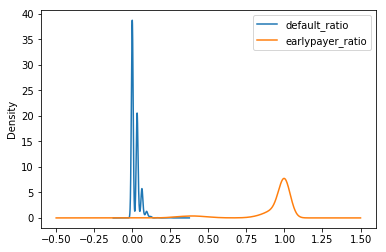

In [157]:
ax = to_modeling[["default_ratio","earlypayer_ratio"]].plot.kde()

In [132]:
x1 = to_modeling.default_ratio.values
x2 = to_modeling.earlypayer_ratio.values
x = np.vstack((x1,x2))
V = np.cov(x)
IV = np.linalg.inv(V)
ref =x[:,0]
to_modeling.loc[:,"score"] = 0
for i in range(len(x.T)):
    to_modeling.loc[i,"score"] = mahalanobis(ref,x[:,i],VI=IV)

#to_modeling.to_csv("maha.csv")

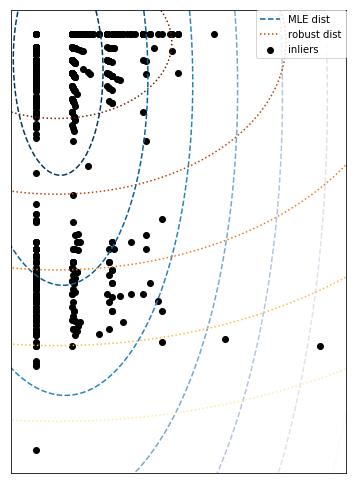

In [133]:
from sklearn.covariance import EmpiricalCovariance, MinCovDet
robust_cov = MinCovDet().fit(x.T)

# compare estimators learnt from the full data set with true parameters
emp_cov = EmpiricalCovariance().fit(x.T)



n_samples = 125
n_outliers = 25
n_features = 2

fig = plt.figure()
plt.subplots_adjust(hspace=-.1, wspace=100, top=5, bottom=.5)

# Show data set
subfig1 = plt.subplot(3, 1, 1)
inlier_plot = subfig1.scatter(x1, x2,
                              color='black', label='inliers')

# Show contours of the distance functions
xx, yy = np.meshgrid(np.linspace(plt.xlim()[0], plt.xlim()[1], 200),
                     np.linspace(plt.ylim()[0], plt.ylim()[1], 200))
zz = np.c_[xx.ravel(), yy.ravel()]

mahal_emp_cov = emp_cov.mahalanobis(zz)
mahal_emp_cov = mahal_emp_cov.reshape(xx.shape)
emp_cov_contour = subfig1.contour(xx, yy, np.sqrt(mahal_emp_cov),
                                  cmap=plt.cm.PuBu_r,
                                  linestyles='dashed')

mahal_robust_cov = robust_cov.mahalanobis(zz)
mahal_robust_cov = mahal_robust_cov.reshape(xx.shape)
robust_contour = subfig1.contour(xx, yy, np.sqrt(mahal_robust_cov),
                                 cmap=plt.cm.YlOrBr_r, linestyles='dotted')


subfig1.legend([emp_cov_contour.collections[1], robust_contour.collections[1],
                inlier_plot],
               ['MLE dist', 'robust dist', 'inliers'],
               loc="upper right", borderaxespad=0)
plt.xticks(())
plt.yticks(())


plt.show()

In [ ]:
to_modeling[["default_ratio","earlypayer_ratio"]].describe()

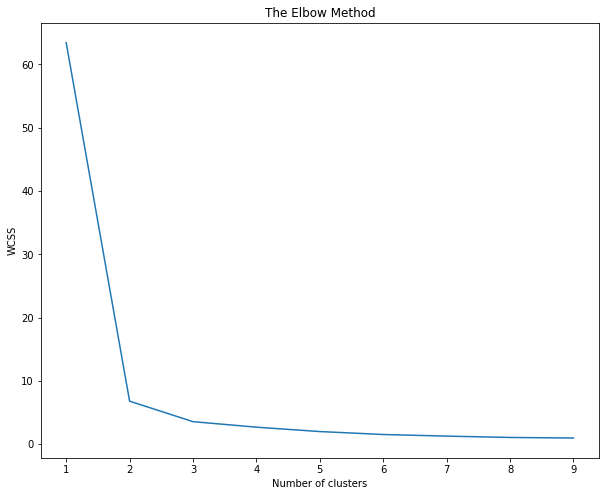

In [141]:
#K-means
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline
plt.figure(figsize=(10, 8))
#dataset1_standardized = preprocessing.scale(principalDf)
#dataset1_standardized = pd.DataFrame(dataset1_standardized)
X = to_modeling[["default_ratio","earlypayer_ratio"]].values
#train,test = train_test_split(principalDf,test_size = 0.33)

wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [146]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans.fit(X)
kmeans.labels_



array([0, 1, 0, ..., 0, 0, 0], dtype=int32)

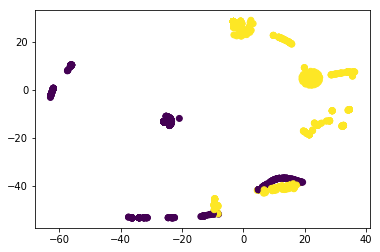

In [150]:
from sklearn.manifold import TSNE
from scipy.special import softmax
model = TSNE(learning_rate=100)

# Fitting Model
transformed = model.fit_transform(X)

# Plotting 2d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

proba_tsne = softmax(transformed,axis =0)
plt.scatter(x_axis, y_axis, c=to_modeling["defaulter"])
plt.show()


In [148]:
to_modeling["kmeans_cluster"] = kmeans.labels_
to_modeling.to_csv("Cluster_analysis.csv",index=False)